<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Random Forests - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [27]:
X.head(10)   #inspect columns and data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
X.nunique()   # check number of unique values in each column.  if low number then could possibly be converted to category.
# CHAS is categorical and already encoded as such (1/0)
# I did NOT choose to make any others categorical because the other columns are ordinal

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [6]:
X.isnull().sum()   #Check for null values - no null values need to be imputed

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [28]:
X.dtypes  # review data types

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [32]:
corr_check=X.copy()   # create data fram to check for correlation to price
corr_check['PRICE']=y
corr_check.corr()['PRICE'].abs().sort_values()   #review sorted correlation to the PRICE column.
#The columns with strongest correlations to price (+ or -) are at the bottom of the list.

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [80]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from category_encoders import OneHotEncoder, OrdinalEncoder

ore=OrdinalEncoder()  #Initialize transformers
ohe=OneHotEncoder()
sc=StandardScaler()
ridge=Ridge()   # Initialize estimators
lasso=Lasso()

lasso.set_params(alpha=1)   #set ridge parameter alpha=1

pipe=make_pipeline(ore, ohe, sc, lasso)   #create pipeline.
# In this case, ohe is not actually needed but I am including it for future flexibility

In [81]:
pipe.fit(X,y)   #fit the data to the pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.0001,
                       warm_start=False))],
         verbose=False)

In [83]:
coeff=pd.DataFrame(lasso.coef_).T
coeff.columns=X.columns
coeff    #The remaining non-zero coefficients are RM, PTRATIO, B, LSTAT

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.0,0.0,-0.0,0.0,-0.0,2.713355,-0.0,-0.0,-0.0,-0.0,-1.343549,0.180957,-3.543381


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [84]:
# See bottom of queston 4 for plot and analysis

In [89]:
# Quick check on 70/30 split:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.3, random_state=2020)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6217746745632575

In [90]:
# Quick check on 90/10 split:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.1, random_state=2020)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6549749379430134

In [ ]:
#The 90/10 split produces a higher score, but I will check this with cross-validaiton below.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [107]:
cv_scores=[]
kvals=range(5,11,1)
splits=[.1, .3]

for split in splits:  #outer loop to cycle through the different split options
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=split, random_state=2020)

    for kval in kvals:  #inner loop to cycle through the different k-folds
        scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=kval)
        cv_scores.append((split, kval, np.mean(scores), np.var(scores), np.min(scores)))
        
cv_scores=pd.DataFrame(cv_scores)
cv_scores.columns=['split', 'kval', 'mean', 'var', 'min']
cv_scores['split']=cv_scores['split'].astype('category')

In [108]:
cv_scores  # review cross-val scores.  note that the means are consistent but the variance spikes at some higher k-values

,split,kval,mean,var,min
0,0.1,5,0.642442,0.006425,0.527655
1,0.1,6,0.648095,0.003997,0.575324
2,0.1,7,0.639225,0.009696,0.437582
3,0.1,8,0.644083,0.005578,0.518733
4,0.1,9,0.630567,0.018889,0.312554
5,0.1,10,0.645404,0.009978,0.427336
6,0.3,5,0.660575,0.003055,0.608846
7,0.3,6,0.653230,0.007880,0.498946
8,0.3,7,0.636522,0.025801,0.284010
9,0.3,8,0.656631,0.015917,0.388974


Text(0, 0.5, 'mean cross-validation score')

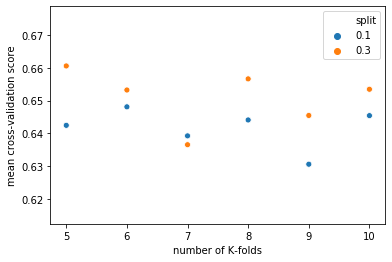

In [113]:
# Plot of mean cross-validations score vs number of k-folds
import seaborn as sns
ax=sns.scatterplot(x='kval', y='mean', hue='split', data=cv_scores)
plt.xlabel('number of K-folds')
plt.ylabel('mean cross-validation score')

In [ ]:
# the mean of the cross-validation scores shows that a 70/30% split produces better results, contrary to the analysis in question 3
# in general, a K-val of 5 and a split of 70/30 produces the best score, but the difference is small between the other scenarios

## Using Random Forests With the Boston Dataset

#### Create X and y variables for Your Data

In [145]:
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = boston.target
                 

#### Divide it into a training and test set

In [188]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=2020)

In [189]:
X_train.shape, y_train.shape

((404, 13), (404,))

#### Fit a Random Forest on the data

In [221]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf    = RandomForestRegressor()
rf_pipe = make_pipeline(ore, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, 

#### What are its most important features?

In [219]:
# number of trees (n_estimators)

#### How well does your model perform on your test set?

In [220]:
rf_pipe.score(X_test, y_test)

0.784875477793164

#### Challenge:  Try and find at least two improvements to your model to improve test scores.

You can try the following:
 - increasing the number of trees
 - using a different number of maximum features to sample
 - using a different number of minimum samples per leaf

In [222]:
rf_pipe[1].set_params(min_samples_leaf=3)  #increasing the min samples per leaf has only a small improvement, if any.
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.7883476121515997

In [223]:
# NOTE that when running this cell, the change above still applies
rf_pipe[1].set_params(n_estimators=1000)   #increasing the number of trees above 100 has only a small improvement, if any.
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.7848338450515826

In [224]:
# NOTE that when running this cell, the change above still applies
rf_pipe[1].set_params(max_features=3)  # limiting the max number of features produces the biggest improvement to the test score
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

0.8378199814115203

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [225]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [226]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                   1.38e-321
Time:                        17:29:34   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

In [ ]:
# Check out Pearson scores
